<a href="https://colab.research.google.com/github/Anunay-G/ANUNAY/blob/main/Vodafone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings 

from statistics import mean, stdev
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import lightgbm as lgb

from sklearn.feature_selection import SelectKBest, chi2

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/gdrive/My Drive/VodafoneProject/water_potability.csv')

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.shape

(3276, 10)

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
for column in df.columns:
    print("{} has {} unique values".format(column, len(df[column].unique())))

ph has 2786 unique values
Hardness has 3276 unique values
Solids has 3276 unique values
Chloramines has 3276 unique values
Sulfate has 2496 unique values
Conductivity has 3276 unique values
Organic_carbon has 3276 unique values
Trihalomethanes has 3115 unique values
Turbidity has 3276 unique values
Potability has 2 unique values


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


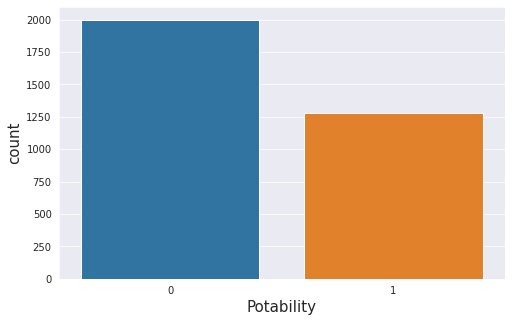

In [ ]:
pot_lbl = df.Potability.value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(pot_lbl.index, pot_lbl);
plt.xlabel('Potability', fontsize=15)
plt.ylabel('count', fontsize=15);

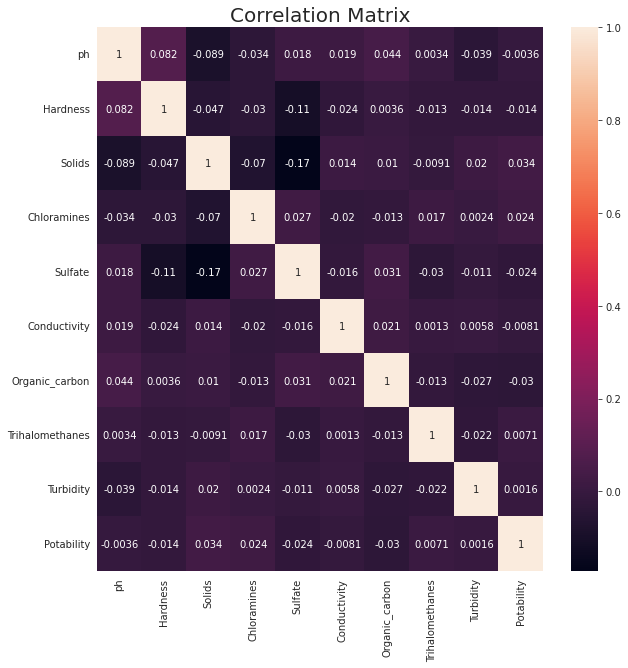

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=20);

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (0, 10)


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ph                     1.968974
Hardness              39.816918
Solids             11666.071830
Chloramines            1.987466
Sulfate               52.250673
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       21.492937
Turbidity              1.060609
Potability             1.000000
dtype: float64


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(2951, 10)

In [ ]:
for x in ['Turbidity','Trihalomethanes','Organic_carbon','Sulfate','Conductivity','Chloramines','Solids','Hardness','ph']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan


In [ ]:
df.isnull().sum()

ph                 451
Hardness             0
Solids               0
Chloramines          0
Sulfate            704
Conductivity         0
Organic_carbon       0
Trihalomethanes    147
Turbidity            0
Potability           0
dtype: int64

In [ ]:

 
missing_col = ['Turbidity','Trihalomethanes','Organic_carbon','Sulfate','Conductivity','Chloramines','Solids','Hardness','ph']
 
#Technique 2: Using median to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df.isnull().sum()


count of NULL values after imputation



ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

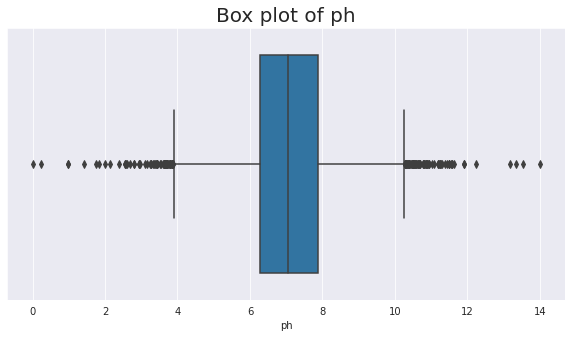

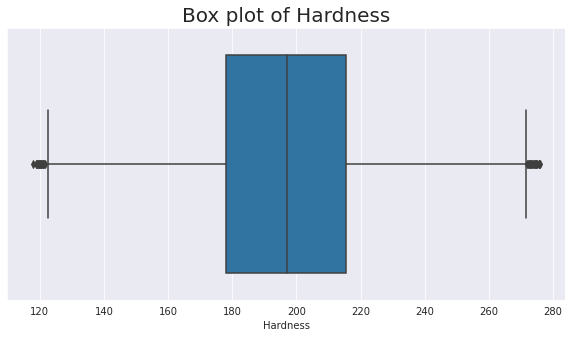

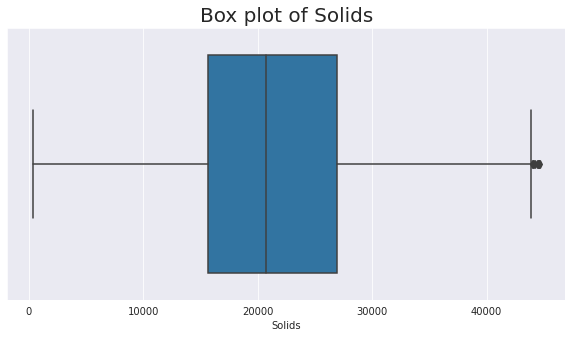

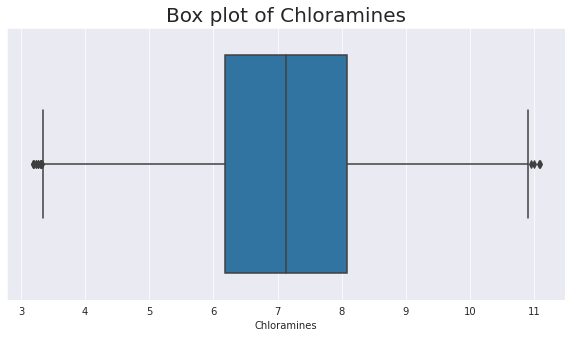

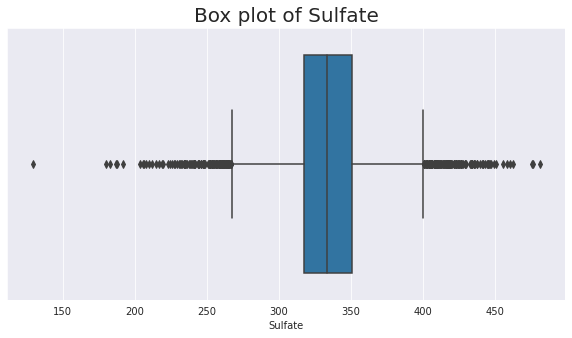

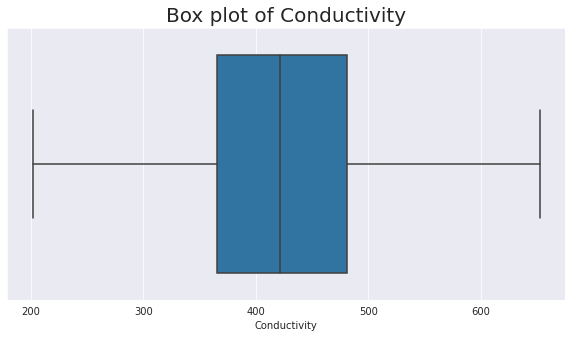

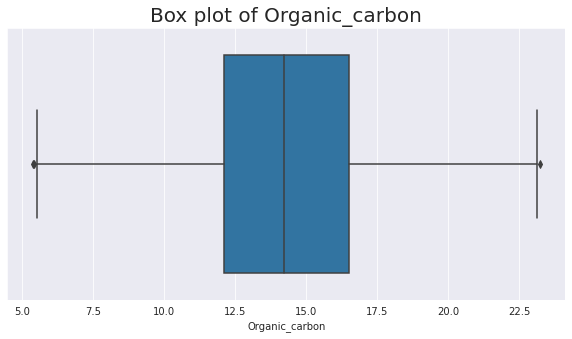

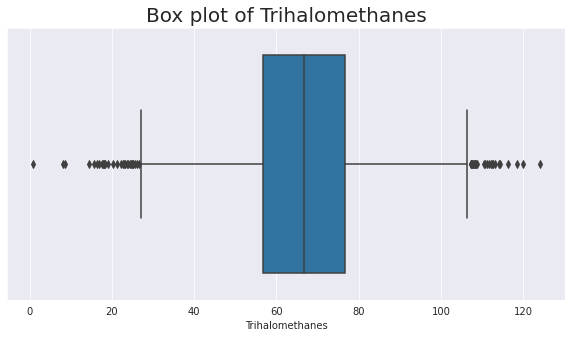

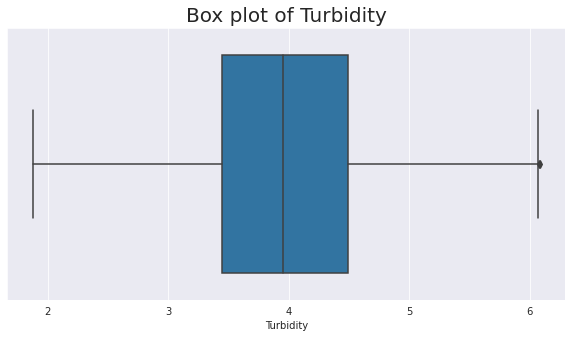

In [ ]:
for column in df.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[column])
    plt.title('Box plot of {}'.format(column), fontsize=20);

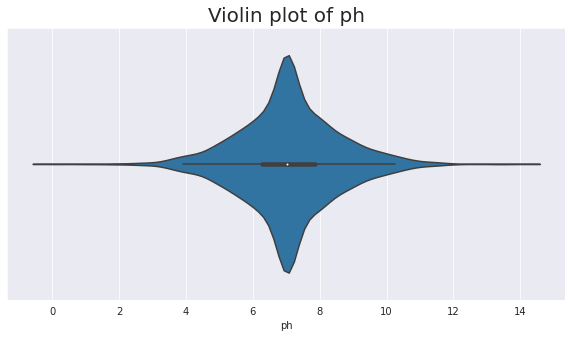

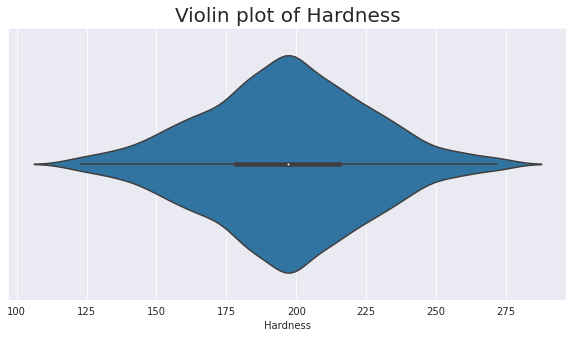

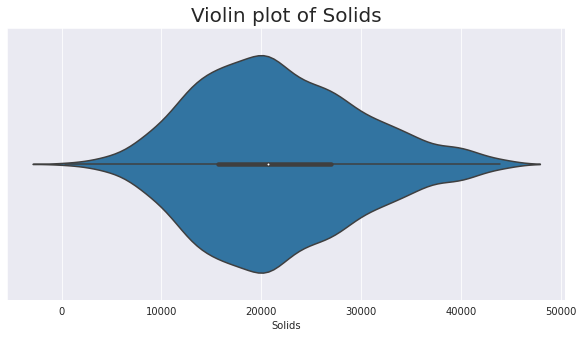

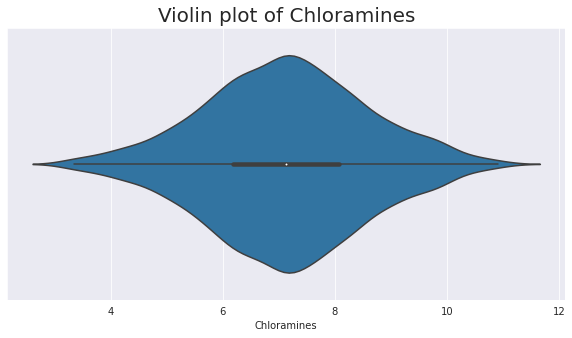

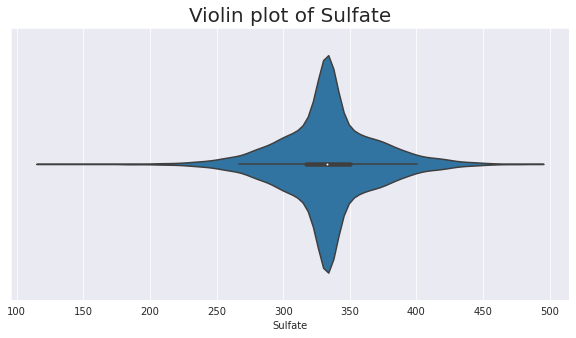

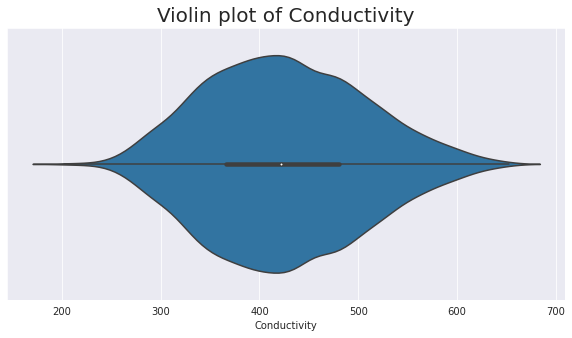

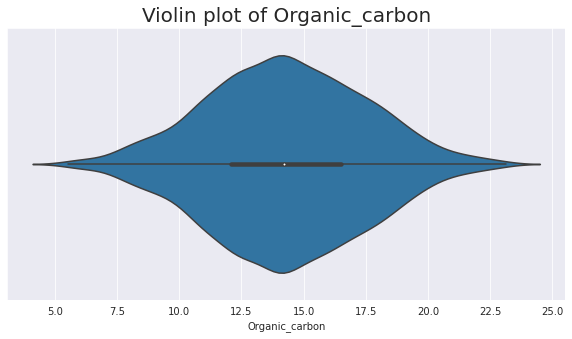

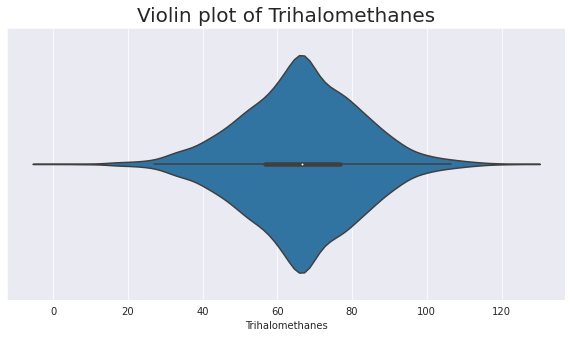

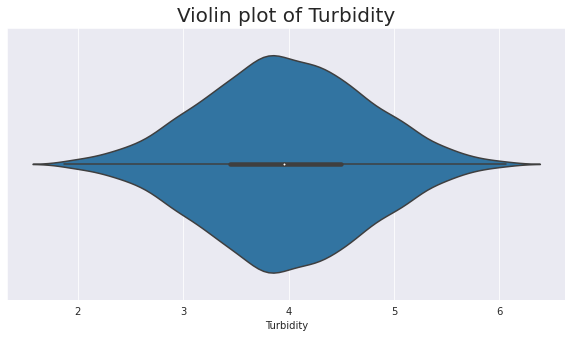

In [ ]:
for column in df.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.violinplot(df[column])
    plt.title('Violin plot of {}'.format(column), fontsize=20);

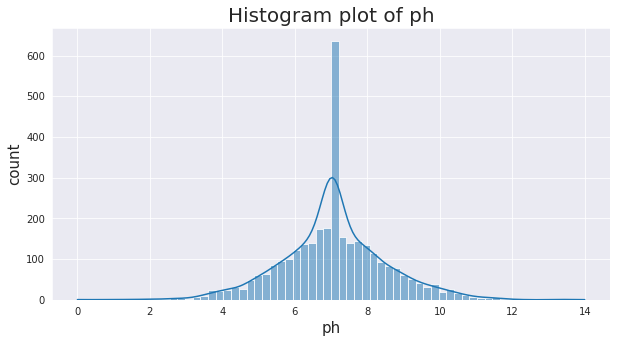

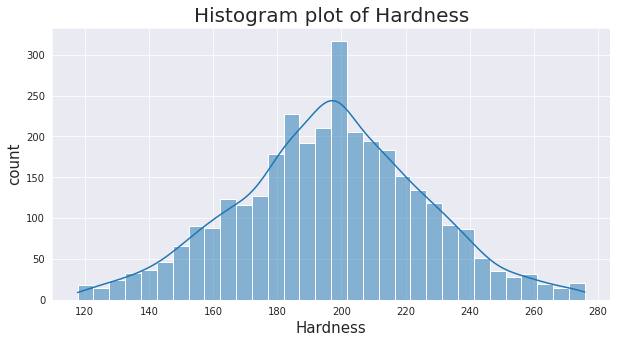

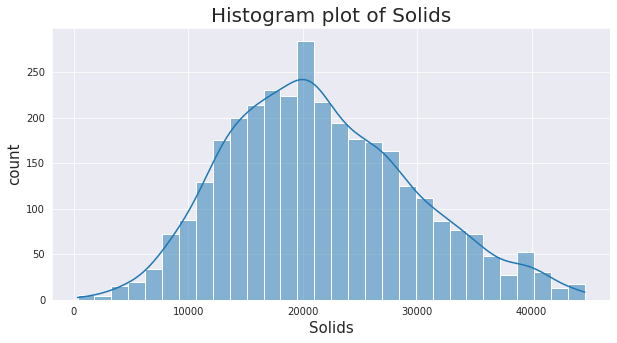

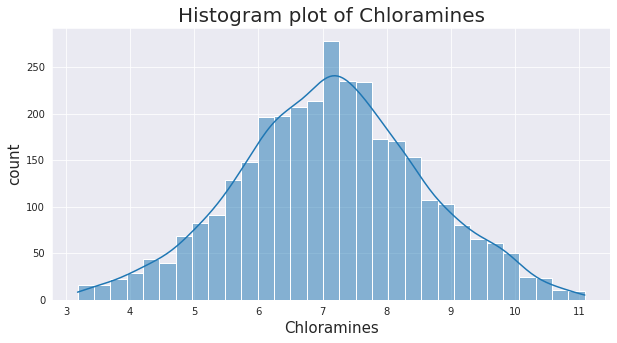

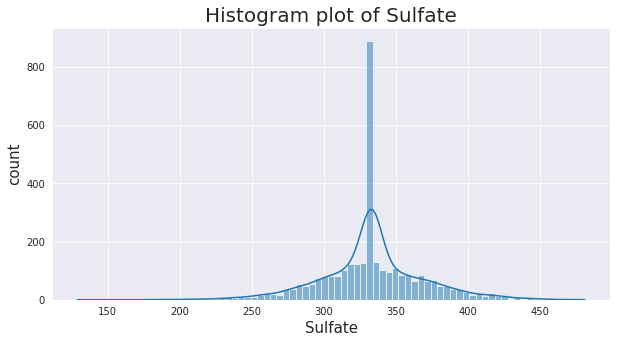

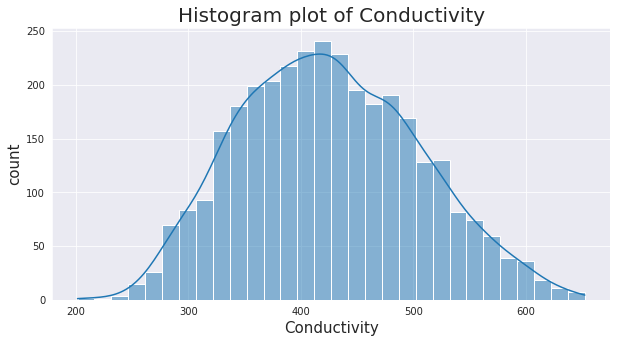

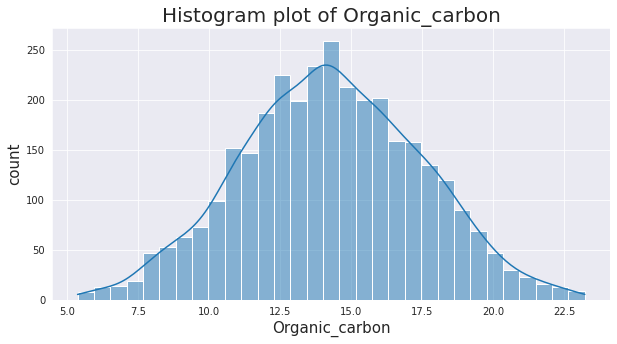

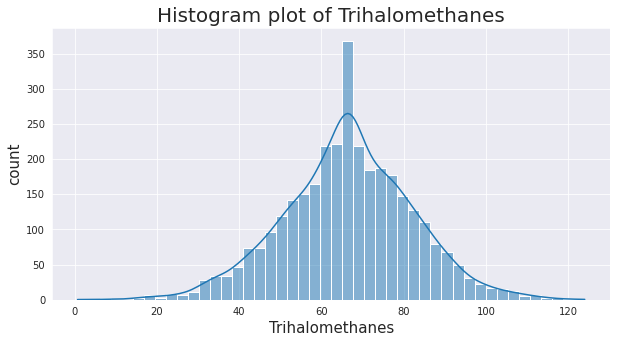

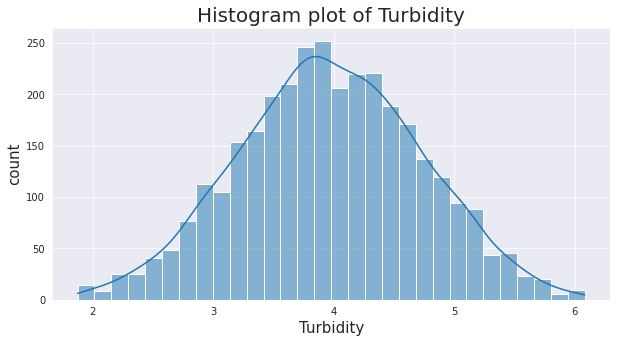

In [ ]:
for column in df.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True)
    plt.xlabel(column, fontsize=15)
    plt.ylabel('count', fontsize=15)
    plt.title('Histogram plot of {}'.format(column), fontsize=20);

In [ ]:
ph_median = df[df['Potability'] == 0]['ph'].median(skipna=True)
df.loc[(df['Potability'] == 0) & (df['ph'].isna()), 'ph'] = ph_median

ph_median_1 = df[df['Potability'] == 1]['ph'].median(skipna=True)
df.loc[(df['Potability'] == 1) & (df['ph'].isna()), 'ph'] = ph_median_1

sulf_median = df[df['Potability'] == 0]['Sulfate'].median(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Sulfate'].isna()), 'Sulfate'] = sulf_median

sulf_median_1 = df[df['Potability'] == 1]['Sulfate'].median(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Sulfate'].isna()), 'Sulfate'] = sulf_median_1

traih_median = df[df['Potability'] == 0]['Trihalomethanes'].median(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = traih_median

trah_median_1 = df[df['Potability'] == 1]['Trihalomethanes'].median(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = trah_median_1

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.025306,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.499203,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.499203,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (2360, 9)
X_test shape:  (591, 9)


In [ ]:
mn = MinMaxScaler()

X_train = mn.fit_transform(X_train)
X_test = mn.transform(X_test)

In [ ]:
best_feature = SelectKBest(score_func = chi2, k = 9)
fit= best_feature.fit(X,y)

In [ ]:
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

In [ ]:
mab = MaxAbsScaler()
X_train = mab.fit_transform(X_train)
X_test = mab.transform(X_test)

In [ ]:
pt = PowerTransformer()
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

In [ ]:
qt = QuantileTransformer()
X_train = qt.fit_transform(X_train)
X_test = qt.transform(X_test)

In [ ]:
models_acc = []

models = [LogisticRegression(), KNeighborsClassifier(),DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(), SVC(),XGBClassifier(), lgb.LGBMClassifier(), CatBoostClassifier(), LinearDiscriminantAnalysis(), AdaBoostClassifier()]

for model in models:
   
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    
    models_acc.append(accuracy_score(y_test, pred))

Learning rate set to 0.014865
0:	learn: 0.6839254	total: 54.2ms	remaining: 54.1s
1:	learn: 0.6762948	total: 67.9ms	remaining: 33.9s
2:	learn: 0.6711504	total: 76.1ms	remaining: 25.3s
3:	learn: 0.6650708	total: 84.5ms	remaining: 21s
4:	learn: 0.6590119	total: 88.3ms	remaining: 17.6s
5:	learn: 0.6524743	total: 99.9ms	remaining: 16.6s
6:	learn: 0.6458071	total: 116ms	remaining: 16.5s
7:	learn: 0.6403490	total: 125ms	remaining: 15.4s
8:	learn: 0.6360438	total: 130ms	remaining: 14.3s
9:	learn: 0.6294896	total: 140ms	remaining: 13.8s
10:	learn: 0.6264901	total: 149ms	remaining: 13.4s
11:	learn: 0.6211811	total: 184ms	remaining: 15.2s
12:	learn: 0.6171036	total: 201ms	remaining: 15.3s
13:	learn: 0.6117120	total: 212ms	remaining: 14.9s
14:	learn: 0.6082670	total: 216ms	remaining: 14.2s
15:	learn: 0.6040168	total: 225ms	remaining: 13.8s
16:	learn: 0.5995712	total: 230ms	remaining: 13.3s
17:	learn: 0.5938182	total: 239ms	remaining: 13s
18:	learn: 0.5888859	total: 248ms	remaining: 12.8s
19:	learn

In [ ]:
res = pd.DataFrame({
    'Model Accuracy': models_acc, 
    "Model Name": ['LogisticRegression', 'KNeighborsClassifier','DecisionTrees', 'RandomForestClassifier', 'GaussianNB', 'SVC','XGBClassifier', 'LGBMClassifier','CatboostClassifier', 'LinearDiscriminantAnalysis', 'AdaBoostClassifier']
})

In [ ]:
res
#robust

,Model Accuracy,Model Name
0,0.628049,LogisticRegression
1,0.623476,KNeighborsClassifier
2,0.739329,DecisionTrees
3,0.804878,RandomForestClassifier
4,0.617378,GaussianNB
5,0.682927,SVC
6,0.809451,XGBClassifier
7,0.789634,LGBMClassifier
8,0.807927,CatboostClassifier
9,0.626524,LinearDiscriminantAnalysis


In [ ]:
res
#minmax

,Model Accuracy,Model Name
0,0.628049,LogisticRegression
1,0.623476,KNeighborsClassifier
2,0.717988,DecisionTrees
3,0.810976,RandomForestClassifier
4,0.617378,GaussianNB
5,0.678354,SVC
6,0.809451,XGBClassifier
7,0.795732,LGBMClassifier
8,0.807927,CatboostClassifier
9,0.626524,LinearDiscriminantAnalysis


In [ ]:
res #maxabs


,Model Accuracy,Model Name
0,0.628049,LogisticRegression
1,0.621951,KNeighborsClassifier
2,0.727134,DecisionTrees
3,0.807927,RandomForestClassifier
4,0.617378,GaussianNB
5,0.679878,SVC
6,0.809451,XGBClassifier
7,0.794207,LGBMClassifier
8,0.807927,CatboostClassifier
9,0.626524,LinearDiscriminantAnalysis


In [ ]:
res #PowerTransformer

,Model Accuracy,Model Name
0,0.628049,LogisticRegression
1,0.637195,KNeighborsClassifier
2,0.719512,DecisionTrees
3,0.803354,RandomForestClassifier
4,0.621951,GaussianNB
5,0.682927,SVC
6,0.809451,XGBClassifier
7,0.783537,LGBMClassifier
8,0.807927,CatboostClassifier
9,0.628049,LinearDiscriminantAnalysis


In [ ]:
res #Quantile transformer

,Model Accuracy,Model Name
0,0.629573,LogisticRegression
1,0.643293,KNeighborsClassifier
2,0.721037,DecisionTrees
3,0.812500,RandomForestClassifier
4,0.640244,GaussianNB
5,0.687500,SVC
6,0.809451,XGBClassifier
7,0.797256,LGBMClassifier
8,0.809451,CatboostClassifier
9,0.628049,LinearDiscriminantAnalysis


In [ ]:
res #Quantile transformer 
# dropped outtliers

,Model Accuracy,Model Name
0,0.607445,LogisticRegression
1,0.615905,KNeighborsClassifier
2,0.749577,DecisionTrees
3,0.773266,RandomForestClassifier
4,0.615905,GaussianNB
5,0.658206,SVC
6,0.788494,XGBClassifier
7,0.788494,LGBMClassifier
8,0.796954,CatboostClassifier
9,0.607445,LinearDiscriminantAnalysis


In [ ]:
res #Quantile transformer 
# median outtliers

,Model Accuracy,Model Name
0,0.628049,LogisticRegression
1,0.612805,KNeighborsClassifier
2,0.567073,DecisionTrees
3,0.679878,RandomForestClassifier
4,0.632622,GaussianNB
5,0.663110,SVC
6,0.679878,XGBClassifier
7,0.670732,LGBMClassifier
8,0.669207,CatboostClassifier
9,0.628049,LinearDiscriminantAnalysis


In [ ]:
ensemble = VotingClassifier(estimators=[('XGBClassifier', XGBClassifier() ), ('Random Forest', RandomForestClassifier()),]
                            , voting='hard').fit(X_train,y_train)
print('The accuracy for XGB and Random Forest is:',ensemble.score(X_test , y_test))

The accuracy for XGB and Random Forest is: 0.7834179357021996


In [ ]:
ensemble2 = StackingClassifier(estimators=[('XGBClassifier', XGBClassifier() ), ('Random Forest', RandomForestClassifier()),],
                               final_estimator=LogisticRegression()).fit(X_train,y_train)
print('The accuracy for XGB and Random Forest is:',ensemble2.score(X_test , y_test))

The accuracy for XGB and Random Forest is: 0.7918781725888325


In [ ]:
skf = StratifiedKFold(n_splits=10)
lst_accu_stratified = []
  

In [ ]:
X_Scaled = qt.fit_transform(X)

In [ ]:
lr = linear_model.LogisticRegression()

In [ ]:
rf = RandomForestClassifier()

In [ ]:
xgb = XGBClassifier()

In [ ]:
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X_Scaled[train_index], X_Scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    ensemble2.fit(X_train_fold, y_train_fold)
    lst_accu_stratified.append(ensemble2.score(X_test_fold, y_test_fold))

In [ ]:
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',     
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.7837837837837838, 0.7728813559322034, 0.8067796610169492, 0.7864406779661017, 0.7898305084745763, 0.7661016949152543, 0.7559322033898305, 0.7796610169491526, 0.8067796610169492, 0.7491525423728813, 0.7871621621621622, 0.752542372881356, 0.8033898305084746, 0.7830508474576271, 0.7966101694915254, 0.7491525423728813, 0.7423728813559322, 0.7661016949152543, 0.7932203389830509, 0.7627118644067796]

Maximum Accuracy That can be obtained from this model is: 80.67796610169492 %

Minimum Accuracy: 74.23728813559322 %

Overall Accuracy: 77.66828905176362 %

Standard Deviation is: 0.02027851442540908


In [ ]:
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X_Scaled[train_index], X_Scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    lr.fit(X_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(X_test_fold, y_test_fold))

In [ ]:
type(lst_accu_stratified)

list

In [ ]:
print('List of possible accuracy:', lst_accu_stratified)
lst_accu_stratified.sort()
lst_accu_stratified[-1]


List of possible accuracy: [0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6134969325153374, 0.6134969325153374, 0.6073619631901841, 0.6073619631901841, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6134969325153374, 0.6134969325153374, 0.6073619631901841, 0.6073619631901841, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975609756, 0.6097560975

0.6134969325153374

In [ ]:
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X_Scaled[train_index], X_Scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    rf.fit(X_train_fold, y_train_fold)
    lst_accu_stratified.append(rf.score(X_test_fold, y_test_fold))

In [ ]:
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.7837837837837838, 0.7728813559322034, 0.8067796610169492, 0.7864406779661017, 0.7898305084745763, 0.7661016949152543, 0.7559322033898305, 0.7796610169491526, 0.8067796610169492, 0.7491525423728813, 0.7871621621621622, 0.752542372881356, 0.8033898305084746, 0.7830508474576271, 0.7966101694915254, 0.7491525423728813, 0.7423728813559322, 0.7661016949152543, 0.7932203389830509, 0.7627118644067796, 0.7905405405405406, 0.752542372881356, 0.7966101694915254, 0.7898305084745763, 0.8033898305084746, 0.7423728813559322, 0.752542372881356, 0.7491525423728813, 0.7966101694915254, 0.7694915254237288]

Maximum Accuracy That can be obtained from this model is: 80.67796610169492 %

Minimum Accuracy: 74.23728813559322 %

Overall Accuracy: 77.5891357459154 %

Standard Deviation is: 0.021024647797029575


In [ ]:
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X_Scaled[train_index], X_Scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    xgb.fit(X_train_fold, y_train_fold)
    lst_accu_stratified.append(xgb.score(X_test_fold, y_test_fold))

In [ ]:
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.7837837837837838, 0.7728813559322034, 0.8067796610169492, 0.7864406779661017, 0.7898305084745763, 0.7661016949152543, 0.7559322033898305, 0.7796610169491526, 0.8067796610169492, 0.7491525423728813, 0.7871621621621622, 0.752542372881356, 0.8033898305084746, 0.7830508474576271, 0.7966101694915254, 0.7491525423728813, 0.7423728813559322, 0.7661016949152543, 0.7932203389830509, 0.7627118644067796, 0.7905405405405406, 0.752542372881356, 0.7966101694915254, 0.7898305084745763, 0.8033898305084746, 0.7423728813559322, 0.752542372881356, 0.7491525423728813, 0.7966101694915254, 0.7694915254237288, 0.7837837837837838, 0.7559322033898305, 0.8033898305084746, 0.7796610169491526, 0.7898305084745763, 0.7627118644067796, 0.7423728813559322, 0.7796610169491526, 0.7966101694915254, 0.7627118644067796]

Maximum Accuracy That can be obtained from this model is: 80.67796610169492 %

Minimum Accuracy: 74.23728813559322 %

Overall Accuracy: 77.58351465872653 %

Standard Deviatio